# Import Dependency

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Regression

In [ ]:
# Import data
df_reg = pd.read_csv('fuel.csv', index_col=0)
df_reg

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [ ]:
# Memisahkan features and label
X_reg = df_reg.drop('MPG', axis=1)
y_reg = df_reg['MPG']

In [ ]:
X_reg.describe().transpose()[['mean', 'std']] # As we can see, mean and std is so far

,mean,std
Cylinders,5.471939,1.705783
Displacement,194.411990,104.644004
Horsepower,104.469388,38.491160
Weight,2977.584184,849.402560
Acceleration,15.541327,2.758864
Model Year,75.979592,3.683737
Europe,0.173469,0.379136
Japan,0.201531,0.401656
USA,0.625000,0.484742


In [ ]:
# Add normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_reg))

In [ ]:
print(normalizer.mean.numpy())

[[5.47193813e+00 1.94412003e+02 1.04469383e+02 2.97758423e+03
  1.55413265e+01 7.59795990e+01 1.73469394e-01 2.01530606e-01
  6.25000000e-01]]


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

# Compile the model
model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50
7/7 [==============================] - 1s 32ms/step - loss: 23.1630 - val_loss: 23.8535
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 22.6620 - val_loss: 23.3558
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 22.1286 - val_loss: 22.8069
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 21.5132 - val_loss: 22.1496
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 20.7693 - val_loss: 21.3212
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 19.8127 - val_loss: 20.2562
Epoch 7/50
7/7 [==============================] - 0s 12ms/step - loss: 18.5772 - val_loss: 18.8706
Epoch 8/50
7/7 [==============================] - 0s 8ms/step - loss: 17.0558 - val_loss: 17.3593
Epoch 9/50
7/7 [==============================] - 0s 10ms/step - loss: 15.5618 - val_loss: 15.8878
Epoch 10/50
7/7 [==============================] - 0s 8ms/step - loss: 14.1023 - val_loss: 14.3076
Epoch 11/50
7

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Data: {loss}")

3/3 [==============================] - 0s 5ms/step - loss: 1.8490
Mean Absolute Error on Test Data: 1.8489768505096436


In [ ]:
predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test,predictions)

print('MAE: ' + str(MAE))
print('MSE: ' + str(MSE))
print('RMSE: ' + str(RMSE))
print('R_squared: ' + str(R_squared))

3/3 [==============================] - 0s 3ms/step
MAE: 1.8489769102651863
MSE: 7.576965427536495
RMSE: 2.7526288212427943
R_squared: 0.851550179355739


# Classification

In [ ]:
# Import data
df_cla = pd.read_csv('gender.csv')
df_cla

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
label_encoder = LabelEncoder()
df_cla['gender'] = label_encoder.fit_transform(df_cla['gender'])

In [ ]:
# Memisahkan features and label
X_cla = df_cla.drop('gender', axis=1)
y_cla = df_cla['gender']

In [ ]:
# Membagi dataset menjadi training set dan test set
# dengan jumlah test set adalah sebanyak 20% dari data keseluruhan
X_train, X_test, y_train, y_test = train_test_split(X_cla, y_cla, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
125/125 [==============================] - 2s 7ms/step - loss: 0.7453 - accuracy: 0.7122 - val_loss: 0.5278 - val_accuracy: 0.9451
Epoch 2/50
125/125 [==============================] - 1s 6ms/step - loss: 0.4215 - accuracy: 0.9498 - val_loss: 0.3209 - val_accuracy: 0.9500
Epoch 3/50
125/125 [==============================] - 1s 6ms/step - loss: 0.2476 - accuracy: 0.9523 - val_loss: 0.1955 - val_accuracy: 0.9520
Epoch 4/50
125/125 [==============================] - 0s 4ms/step - loss: 0.1618 - accuracy: 0.9528 - val_loss: 0.1436 - val_accuracy: 0.9530
Epoch 5/50
125/125 [==============================] - 0s 4ms/step - loss: 0.1265 - accuracy: 0.9507 - val_loss: 0.1214 - val_accuracy: 0.9530
Epoch 6/50
125/125 [==============================] - 0s 4ms/step - loss: 0.1109 - accuracy: 0.9528 - val_loss: 0.1114 - val_accuracy: 0.9550
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9503 - val_loss: 0.1070 - val_accuracy: 0.9560
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

32/32 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.9550
Test accuracy: 0.9550


In [ ]:
y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)
print(classification_report(y_test, y_pred, target_names=['male', 'female']))

32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

        male       0.94      0.97      0.96       502
      female       0.97      0.94      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



# Image Classification

In [ ]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a 784-dimensional vector
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1688/1688 [==============================] - 20s 7ms/step - loss: 0.3087 - accuracy: 0.9102 - val_loss: 0.1213 - val_accuracy: 0.9667
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1511 - accuracy: 0.9552 - val_loss: 0.0949 - val_accuracy: 0.9737
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1117 - accuracy: 0.9665 - val_loss: 0.0793 - val_accuracy: 0.9770
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0926 - accuracy: 0.9717 - val_loss: 0.0759 - val_accuracy: 0.9793
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0785 - accuracy: 0.9753 - val_loss: 0.0813 - val_accuracy: 0.9768
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0705 - accuracy: 0.9772 - val_loss: 0.0715 - val_accuracy: 0.9805
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - 

1/1 [==============================] - 0s 86ms/step


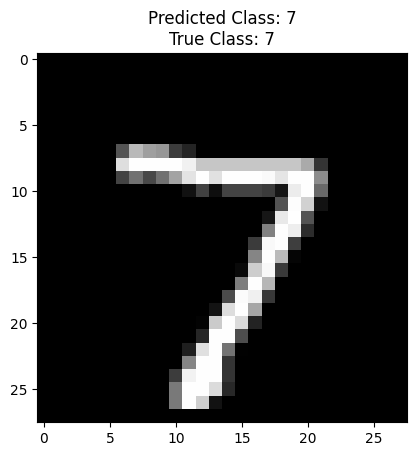

In [ ]:

# Make predictions
sample_image = X_test[0]  # Replace with your image data
sample_label = y_test[0]  # Replace with the corresponding label

sample_image = sample_image.reshape(1, 28, 28)  # Reshape to match model's input shape
predicted_probs = model.predict(sample_image)
predicted_class = np.argmax(predicted_probs, axis=1)[0]

# Display the image and predicted class
plt.imshow(X_test[0], cmap='gray')
plt.title(f'Predicted Class: {predicted_class}\nTrue Class: {np.argmax(sample_label)}')
plt.show()